In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kritikseth_fruit_and_vegetable_image_recognition_path = kagglehub.dataset_download('kritikseth/fruit-and-vegetable-image-recognition')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.18.0


In [12]:
# Create a list with the filepaths for training and testing
train_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [13]:
test_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [14]:
val_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [15]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df

In [16]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [17]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['grapes' 'bell pepper' 'turnip' 'jalepeno' 'potato' 'mango' 'lemon'
 'paprika' 'orange' 'cauliflower' 'eggplant' 'garlic' 'cabbage' 'beetroot'
 'capsicum' 'lettuce' 'soy beans' 'carrot' 'cucumber' 'sweetcorn' 'kiwi'
 'pear' 'pineapple' 'raddish' 'onion' 'sweetpotato' 'chilli pepper'
 'pomegranate' 'apple' 'corn' 'banana' 'tomato' 'peas' 'spinach'
 'watermelon' 'ginger']


In [18]:
train_df.head(5)

,Filepath,Label
0,/kaggle/input/fruit-and-vegetable-image-recogn...,grapes
1,/kaggle/input/fruit-and-vegetable-image-recogn...,grapes
2,/kaggle/input/fruit-and-vegetable-image-recogn...,bell pepper
3,/kaggle/input/fruit-and-vegetable-image-recogn...,turnip
4,/kaggle/input/fruit-and-vegetable-image-recogn...,jalepeno


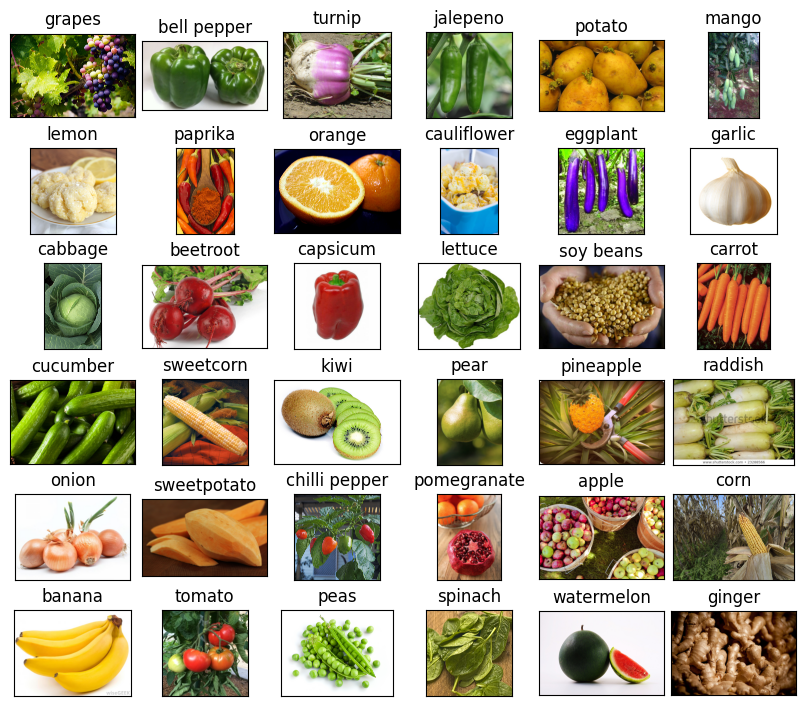

In [19]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [20]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [21]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [22]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [23]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 334 validated image filenames belonging to 36 classes.


In [24]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.3353 - loss: 2.6245 - val_accuracy: 0.8383 - val_loss: 0.4777
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.8294 - loss: 0.5688 - val_accuracy: 0.9072 - val_loss: 0.2794
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.8934 - loss: 0.3350 - val_accuracy: 0.9251 - val_loss: 0.2067
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9358 - loss: 0.2078 - val_accuracy: 0.9371 - val_loss: 0.1848
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9620 - loss: 0.1322 - val_accuracy: 0.9491 - val_loss: 0.1677


In [26]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step


['chilli pepper',
 'lemon',
 'sweetpotato',
 'cabbage',
 'bell pepper',
 'orange',
 'peas',
 'apple',
 'peas',
 'cauliflower',
 'grapes',
 'cucumber',
 'potato',
 'watermelon',
 'ginger',
 'grapes',
 'kiwi',
 'sweetcorn',
 'pear',
 'kiwi',
 'spinach',
 'garlic',
 'pineapple',
 'sweetcorn',
 'pineapple',
 'lemon',
 'mango',
 'watermelon',
 'eggplant',
 'garlic',
 'onion',
 'paprika',
 'spinach',
 'peas',
 'tomato',
 'garlic',
 'soy beans',
 'watermelon',
 'paprika',
 'carrot',
 'spinach',
 'potato',
 'orange',
 'peas',
 'pineapple',
 'pomegranate',
 'soy beans',
 'onion',
 'pineapple',
 'lettuce',
 'kiwi',
 'beetroot',
 'bell pepper',
 'cucumber',
 'raddish',
 'watermelon',
 'sweetpotato',
 'spinach',
 'pineapple',
 'lettuce',
 'apple',
 'pear',
 'eggplant',
 'chilli pepper',
 'cucumber',
 'ginger',
 'cauliflower',
 'ginger',
 'pear',
 'cabbage',
 'orange',
 'tomato',
 'sweetcorn',
 'mango',
 'orange',
 'raddish',
 'grapes',
 'onion',
 'soy beans',
 'raddish',
 'potato',
 'capsicum',
 '

In [27]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [29]:
img = output('/kaggle/input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'apple'

In [30]:
import requests
import json

api_url = 'https://api.api-ninjas.com/v1/nutrition?query={}'.format(img)
response = requests.get(api_url, headers={'X-Api-Key': 'FJCuuMBu83nEaI7CGroR8A==z88oB9CslsPk9p80'})
if response.status_code == requests.codes.ok:
    employee_string = response.text
    json_object = json.loads(employee_string)
    print(json.dumps(json_object[0], indent=4))
else:
    print("Error:", response.status_code, response.text)



{
    "name": "apple",
    "calories": "Only available for premium subscribers.",
    "serving_size_g": "Only available for premium subscribers.",
    "fat_total_g": 0.2,
    "fat_saturated_g": 0.0,
    "protein_g": "Only available for premium subscribers.",
    "sodium_mg": 1,
    "potassium_mg": 11,
    "cholesterol_mg": 0,
    "carbohydrates_total_g": 14.1,
    "fiber_g": 2.4,
    "sugar_g": 10.3
}


In [31]:
model.save('FV.h5')